In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

# Download and process data

In [2]:
vaccinations_url = "data/covid19za_timeline_vaccination.csv"

In [3]:
outformat = 'pdf'

In [4]:
vaccinations = pd.read_csv(vaccinations_url, parse_dates=['date'], index_col='date', dayfirst=True).rename(columns={'total': 'SA'})
del vaccinations['YYYYMMDD']

In [5]:
population = 60e6
totalvaccinated = vaccinations['vaccinations'][-1]

In [6]:
newvaccinations = vaccinations['vaccinations'].diff().resample('1D').mean().fillna(0)

In [7]:
def percentage(pop):
    return pop/population*100

def pop(perc):
    return perc/100*population

In [8]:
hifrac = 2/3

In [9]:
hi = hifrac*population
left = hi - totalvaccinated

In [10]:
rate = newvaccinations.rolling('7D').mean()

In [11]:
maxrate = rate.max()

In [12]:
year = 365

In [13]:
hi/maxrate/year

1.8022014985498553

In [14]:
today = datetime.date.today()

# Plot

In [15]:
rate/1000

date
2021-02-18     0.000000
2021-02-19     2.132000
2021-02-20     2.718000
2021-02-21     3.282000
2021-02-22     4.159800
                ...    
2021-06-06    53.587714
2021-06-07    54.256714
2021-06-08    55.518000
2021-06-09    58.243143
2021-06-10    60.808429
Freq: D, Name: vaccinations, Length: 113, dtype: float64

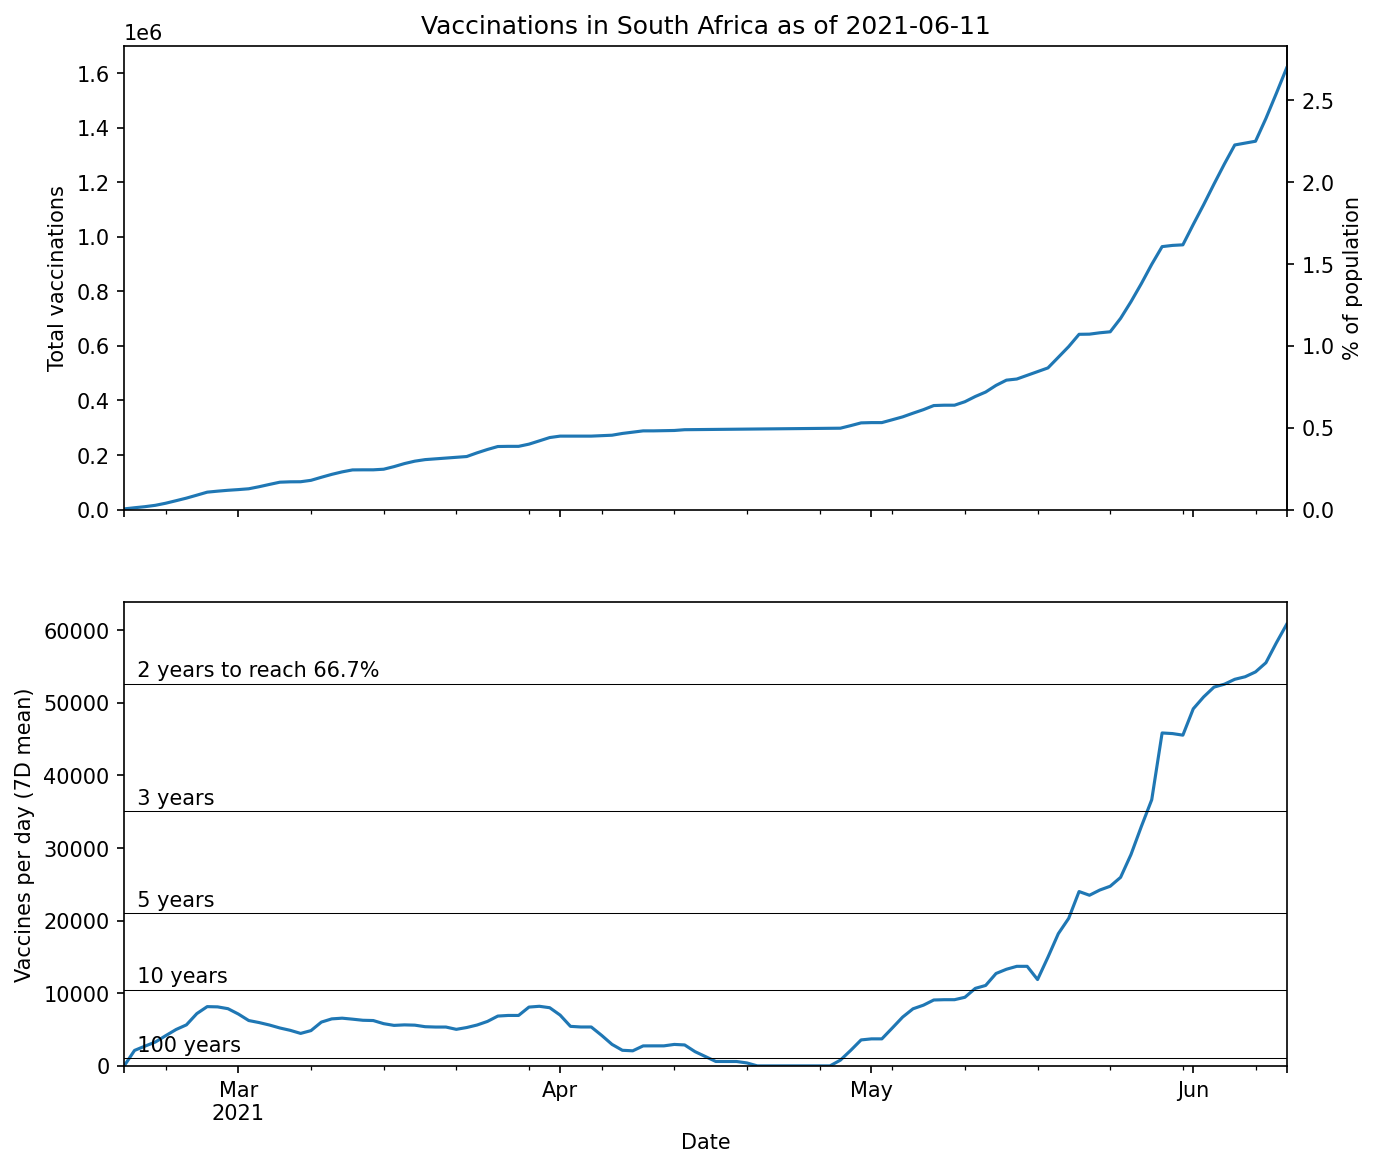

In [16]:
fig, (axtotal, axrate) = plt.subplots(2, 1, figsize=(10, 10), dpi=150, sharex=True)

vaccinations['vaccinations'].plot(ax=axtotal, ylabel='Total vaccinations')
rate.plot(ax=axrate, ylabel='Vaccines per day (7D mean)', xlabel='Date')

axperc = axtotal.secondary_yaxis('right', functions=(percentage, pop))
axperc.set_ylabel('% of population')

axtotal.set_title(f'Vaccinations in South Africa as of {today}')

times = 2, 3, 5, 10, 100

for time in times:
    rateleft = left/(time*year)
    axrate.axhline(rateleft, color='black', lw=0.5)
    if time == times[0]:
        label = f'  {time} years to reach {hifrac:.1%}'
    else:
        label = f'  {time} years'
    axrate.text(rate.index.min(), rateleft+1000, label)
    
axrate.set_ylim(bottom=0)
axtotal.set_ylim(bottom=0)

plt.savefig(f'output/vaccinations.{outformat}')